In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import Fish_data

In [2]:
f = Fish_data .Fish()
dataset = f.get_fish_data()

In [3]:
#fix weights
weight = dataset[['Relative weight']]
weight = weight.fillna(0)
dataset['new_weight'] = weight

In [4]:
#fix dates
from datetime import datetime
datetime_object = datetime.strptime('1700-3-01', '%Y-%m-%d')
dataset['new_date'] = pd.to_datetime(dataset['Date'], format='%Y-%m-%d %H:%M', errors='coerce')
dataset = dataset[dataset['new_date'] > datetime_object]

In [5]:
dataset.head()

,FishID,Date,TREND,Gear,Species,Sex,Length,Mass,Ktl,Relative weight,...,misc 2 num,misc 3 text,misc 4 num,Site,KFL,Day,Month,Year,new_weight,new_date
0,19710001,1971-03-09 00:00:00,1,GN,LMB,NaN,263,250.0,1.37,0.0,...,NaN,NaN,NaN,RN,0.0,9.0,3.0,1971.0,0.0,1971-03-09
1,19710002,1971-03-09 00:00:00,1,GN,LMB,NaN,348,700.0,1.66,0.0,...,NaN,NaN,NaN,RN,0.0,9.0,3.0,1971.0,0.0,1971-03-09
2,19710003,1971-03-09 00:00:00,1,GN,LMB,NaN,332,555.0,1.51,0.0,...,NaN,NaN,NaN,RN,NaN,9.0,3.0,1971.0,0.0,1971-03-09
3,19710004,1971-03-09 00:00:00,1,GN,LMB,NaN,350,720.0,1.67,0.0,...,NaN,NaN,NaN,RN,NaN,9.0,3.0,1971.0,0.0,1971-03-09
4,19710005,1971-03-09 00:00:00,1,GN,LMB,NaN,300,455.0,1.68,0.0,...,NaN,NaN,NaN,RN,NaN,9.0,3.0,1971.0,0.0,1971-03-09


In [6]:
#select for fish with data
specieswithweights = dataset.loc[dataset['new_weight']!=0]
STBspecies = specieswithweights.loc[(specieswithweights['Species'] == "STB") | (specieswithweights['Species'] == "stb")]

SMBspecies = specieswithweights.loc[(specieswithweights['Species'] == "SMB") | (specieswithweights['Species'] == "smb")]



In [7]:
STBspecies['Species'].unique()

array(['STB', 'stb'], dtype=object)

In [8]:
SMBspecies['Species'].unique()

array(['SMB', 'smb'], dtype=object)

# Plot STB weights over time

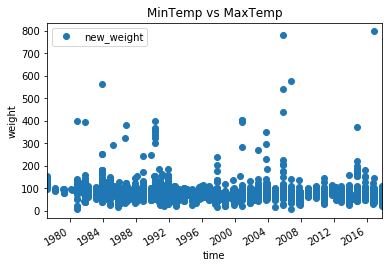

In [27]:
STBspecies.plot(x='new_date', y='new_weight', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('time')  
plt.ylabel('weight')  
plt.show()

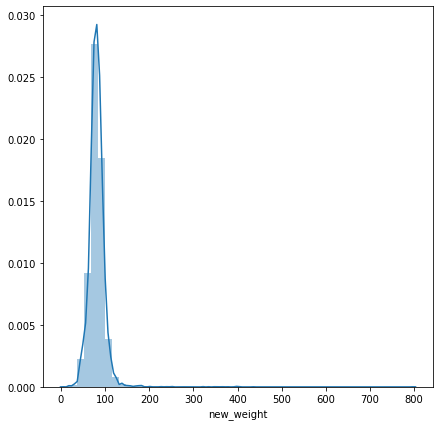

In [10]:
plt.figure(figsize=(7, 7))
plt.tight_layout()
seabornInstance.distplot(STBspecies['new_weight'])

# Plot SMB weights over time

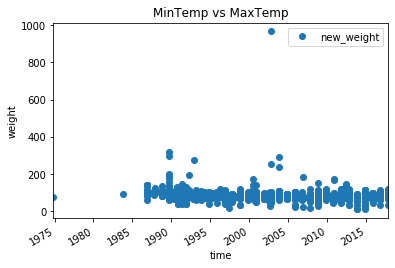

In [11]:
SMBspecies.plot(x='new_date', y='new_weight', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('time')  
plt.ylabel('weight')  
plt.show()

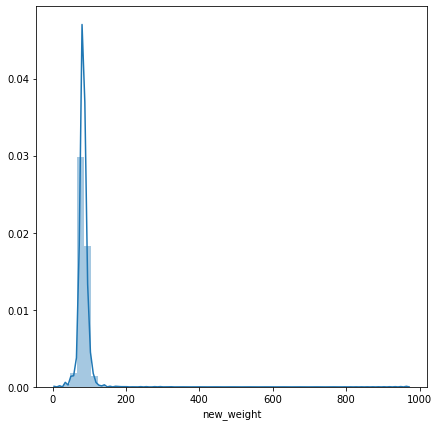

In [12]:
plt.figure(figsize=(7, 7))
plt.tight_layout()
seabornInstance.distplot(SMBspecies['new_weight'])

# Divide into attributes and labels

In [13]:
STBspecies.head()

,FishID,Date,TREND,Gear,Species,Sex,Length,Mass,Ktl,Relative weight,...,misc 2 num,misc 3 text,misc 4 num,Site,KFL,Day,Month,Year,new_weight,new_date
4201,19770088,1977-03-24 00:00:00,1,GN,STB,NaN,463,1180.0,1.18,96.0,...,NaN,NaN,NaN,PB,1.0,24.0,3.0,1977.0,96.0,1977-03-24
4202,19770089,1977-03-23 00:00:00,1,GN,STB,NaN,320,500.0,1.52,123.0,...,NaN,NaN,NaN,RN,2.0,23.0,3.0,1977.0,123.0,1977-03-23
4203,19770090,1977-03-23 00:00:00,1,GN,STB,NaN,310,525.0,1.76,142.0,...,NaN,NaN,NaN,RN,2.0,23.0,3.0,1977.0,142.0,1977-03-23
4204,19770091,1977-03-23 00:00:00,1,GN,STB,NaN,375,900.0,1.70,137.0,...,NaN,NaN,NaN,RN,2.0,23.0,3.0,1977.0,137.0,1977-03-23
4205,19770092,1977-03-23 00:00:00,1,GN,STB,NaN,340,690.0,1.75,141.0,...,NaN,NaN,NaN,RN,2.0,23.0,3.0,1977.0,141.0,1977-03-23


# Linear regression with weight and length

In [71]:
import filter
fil = filter.Filter(STBspecies)

In [ ]:
fil.df.rangeLength(low, high)

In [73]:
fil.rangeLength(0, 800)
fil.df = fil.df[fil.df.new_weight >= 0]
fil.df = fil.df[fil.df.new_weight <= 300]

Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
The test_size variable is where we actually specify the proportion of the test set.

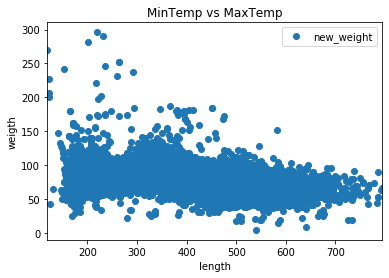

In [74]:
fil.df.plot(x='Length', y='new_weight', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('length')  
plt.ylabel('weigth')  
plt.show()

In [75]:
X = fil.df["Length"].values.reshape(-1,1)
y = fil.df['new_weight'].values.reshape(-1,1)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

After splitting the data into training and testing sets, finally, the time is to train our algorithm.

In [77]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

As we have discussed that the linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset, execute the following code.

In [59]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[-3.93230675]
[[0.09615612]]


Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score.

In [78]:
y_pred = regressor.predict(X_test)

Now compare the actual output values for X_test with the predicted values, execute the following script:

In [79]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,73.0,86.191893
1,91.0,88.521054
2,51.0,68.152312
3,87.0,87.516318
4,72.0,78.656372
...,...,...
2901,84.0,80.483165
2902,68.0,79.935127
2903,75.0,80.802854
2904,69.0,83.360364


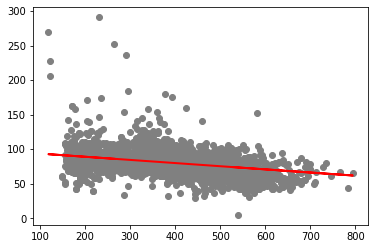

In [80]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()